In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [2]:
X, y = mnist['data'], mnist['target'] 

In [3]:
import matplotlib.pyplot as plt

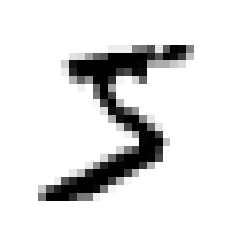

In [4]:
some_digit = X.iloc[0]
img = some_digit.values.reshape(28, 28)
plt.imshow(img, cmap='binary')
plt.axis('off')
plt.show()

In [5]:
y[0]

'5'

In [6]:
import numpy as np
y = y.astype(np.uint8)

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_cls = SGDClassifier(random_state=42)
sgd_cls.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [10]:
sgd_cls.predict(some_digit.values.reshape(1, -1))

array([ True])

In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_cls, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
for train_ind, test_ind in skfolds.split(X_train, y_train_5):
    X_train_folds = X_train.iloc[train_ind]
    y_train_5_folds = y_train_5[train_ind]
    clone_sgd = clone(sgd_cls)
    X_test_fold = X_train.iloc[test_ind]
    y_test_fold = y_train_5[test_ind]
    
    clone_sgd.fit(X_train_folds, y_train_5_folds)
    y_preds = clone_sgd.predict(X_test_fold)
    n_correct = sum(y_preds == y_test_fold)
    print(n_correct / len(y_test_fold))


0.9669
0.91625
0.96785


In [13]:
from sklearn.base import BaseEstimator

class Not5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


In [14]:
not_5_clf = Not5Classifier()
cross_val_score(not_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [15]:
from sklearn.model_selection import cross_val_predict

y_pred_5 = cross_val_predict(sgd_cls, X_train, y_train_5, cv=3)

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_pred_5)

array([[53892,   687],
       [ 1891,  3530]])

In [17]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_pred_5)

0.8370879772350012

In [18]:
recall_score(y_train_5, y_pred_5)

0.6511713705958311

In [19]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_pred_5)

0.7325171197343846

In [20]:
y_scores = sgd_cls.decision_function([some_digit])

In [21]:
threshold = 0
y_pred_custom = (y_scores > threshold)

In [22]:
y_pred_custom

array([ True])

In [23]:
threshold = 8000
y_pred_custom = (y_scores > threshold)
y_pred_custom

array([False])

In [24]:
y_scores = cross_val_predict(sgd_cls, X_train, y_train_5, cv=3, method='decision_function')

In [25]:
from sklearn.metrics import precision_recall_curve

In [26]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [27]:
import matplotlib.pyplot as plt

def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
    plt.legend(loc='center right', fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])
    plt.show()


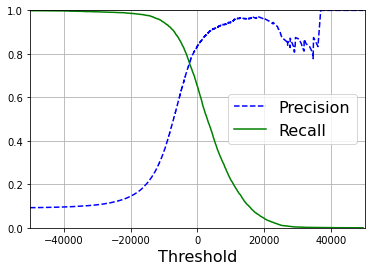

In [28]:
plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)

In [29]:
threshold_90_p = thresholds[np.argmax(precisions >= 0.90)]

In [30]:
y_90_p_pred = (y_scores >= threshold_90_p)

In [31]:
precision_score(y_train_5, y_90_p_pred)

0.9000345901072293

In [32]:
recall_score(y_train_5, y_90_p_pred)

0.4799852425751706

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [34]:
def plot_roc_curve(fpr, tpr, thresholds):
    plt.plot(fpr, tpr, linewidth=2, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.grid(True)


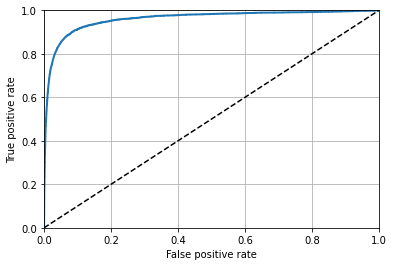

In [35]:
plot_roc_curve(fpr, tpr, thresholds)

In [36]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616